Imports

In [184]:
# conda install seaborn

In [185]:
# conda install -c conda-forge folium 

In [222]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [187]:
# multiple files present in the .zip file
# using zipfile
filename = 'archive.zip'

# opening zip file in read mode
with ZipFile(filename, 'r') as zip:
    # reading the contents of the zip file
    print('Reading contents...')
    zip.printdir()
    # Extract the contents 
    print("Extracting ...")
    zip.extractall()
    print("Done!")

Reading contents...
File Name                                             Modified             Size
AB_NYC_2019.csv                                2019-10-27 22:06:18      7077973
New_York_City_.png                             2019-10-27 22:06:20       192340
Extracting ...
Done!


In [188]:
# getting the dataset set (.csv)
path = 'AB_NYC_2019.csv'
df = pd.read_csv(path)
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [189]:
# inspecting the shape of the dataframe
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")
print(f"Features:\n {df.columns.to_list()}\n")
print(f"Missing values: {df.isna().values.sum()}")
print(f"Unique values:\n {df.nunique()}\n")

Rows: 48895
Cols: 16
Features:
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values: 20141
Unique values:
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64



In [190]:
# looking at the data types and non empty counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [191]:
# last_review and number_of_reviews column have significantly 
# more missing values compared to others
# Not everyone leaves reviews
# Months where the location was not occupied would have no reviews
df_null_count = df.isna().sum(axis=0)
df_null_count

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [192]:
# count and percentage of missing value
# ~ 20% of the data is missing in the last_review and reviews_per_month columns
total = df.isna().sum().sort_values(ascending=False)
percent = (((df.isnull().sum())*100)/df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total    Percent
last_review                     10052  20.558339
reviews_per_month               10052  20.558339
host_name                          21   0.042949
name                               16   0.032723
id                                  0   0.000000
host_id                             0   0.000000
neighbourhood_group                 0   0.000000
neighbourhood                       0   0.000000
latitude                            0   0.000000
longitude                           0   0.000000
room_type                           0   0.000000
price                               0   0.000000
minimum_nights                      0   0.000000
number_of_reviews                   0   0.000000
calculated_host_listings_count      0   0.000000
availability_365                    0   0.000000

In [193]:
# null features
var_with_null = [var for var in df.columns if df[var].isna().sum() > 1]

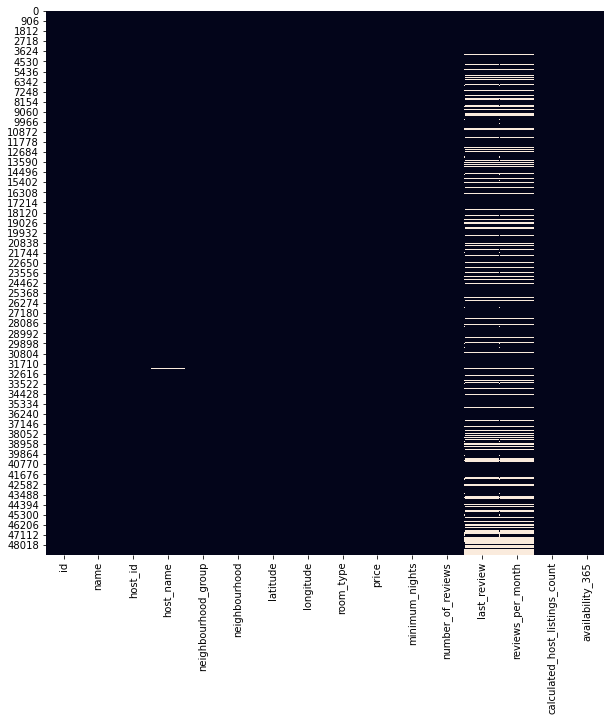

In [194]:
## Visualizing the missing values 
# visual makes it easier to see where the distribution of missing values
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False);

In [195]:
df.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

Few interesting observations from the data:
- On average the places are booked for little over 7 days. People prefer longer stays. 
- Highest price for one night is \$10000. 
- Maximum number of nights stayed is 1250.
- Average price of the places is $152

In [196]:
# features correlation
df.corr().style.background_gradient(cmap='coolwarm')

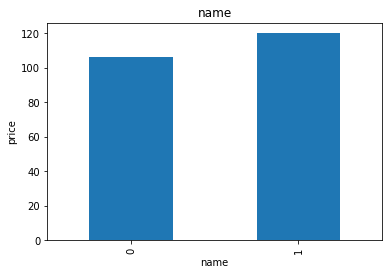

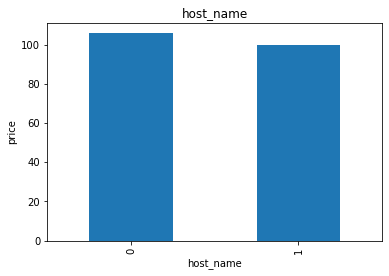

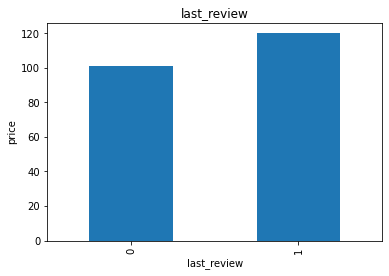

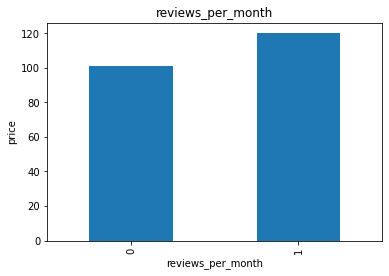

In [197]:
# plotting the realtionship between missing values and the outcome value (price)

def analyse_null_value(df, var):
    df = df.copy()
    
    # create a column with 1 where values are missing, 0 otherwise
    df[var]=np.where(df[var].isna(), 1, 0)
    
    # calculate mean saleprice where the data is missing and compare that with 
    # where data is not missing 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.ylabel('price')
    plt.show()
    
for var in var_with_null:
    analyse_null_value(df, var)
    

Outcome variable which is the price is slightly higher where the value is missing compared to the rows where the values are not missing. 

#### Exploring the features

neighbourhood group

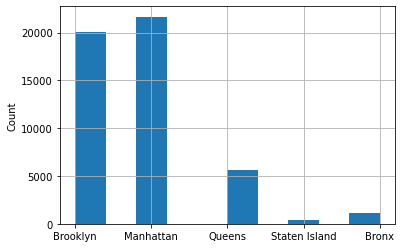

In [198]:
# Plotting a histogram
# manhattan and brooklyn have the highest no of locations

df.neighbourhood_group.hist()
plt.ylabel('Count')
plt.show()

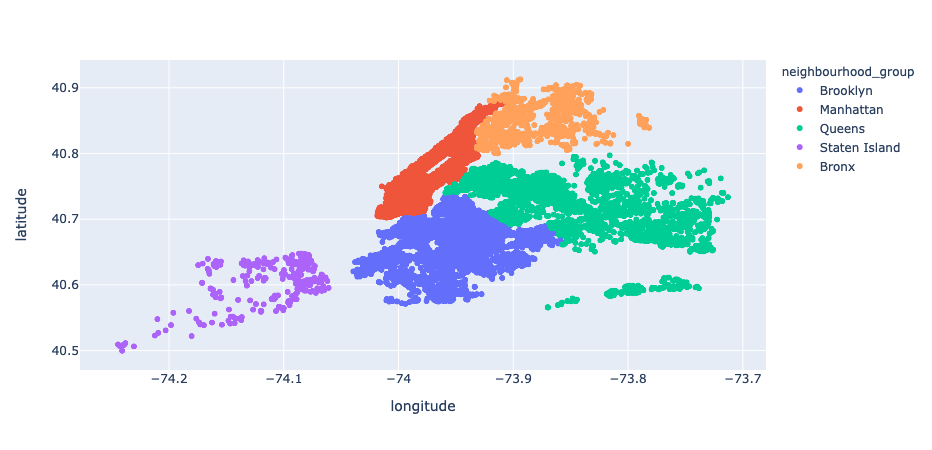

In [199]:
# distribution of the locations by lat long

fig = px.scatter(df, x="longitude", y="latitude", color="neighbourhood_group")
fig.show()

Queens appears to he high as well and easy to confude that it is in comparison with manhattan.

Manhattan has more density which is reflected by the histogram above.

Folium library allows us to visualize over the geographical location

In [200]:
# desnity of the locations overlayed on the map

map = folium.Map([40.7128, -74.0060], zoom_start=11)
HeatMap(df[['latitude', 'longitude']].dropna(), radius=8, gradient={0.2:'blue', 0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map)
display(map)

High density areas are marked in red while low density areas are marked in blue

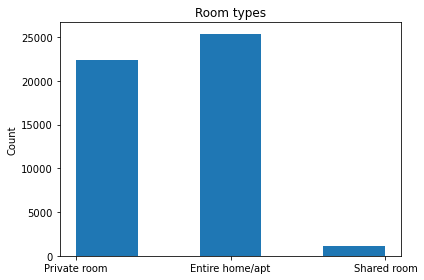

In [201]:
# types of rooms offered.
# Shared rooms are not very popular

plt.hist(df.room_type, bins=5)
plt.title('Room types')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

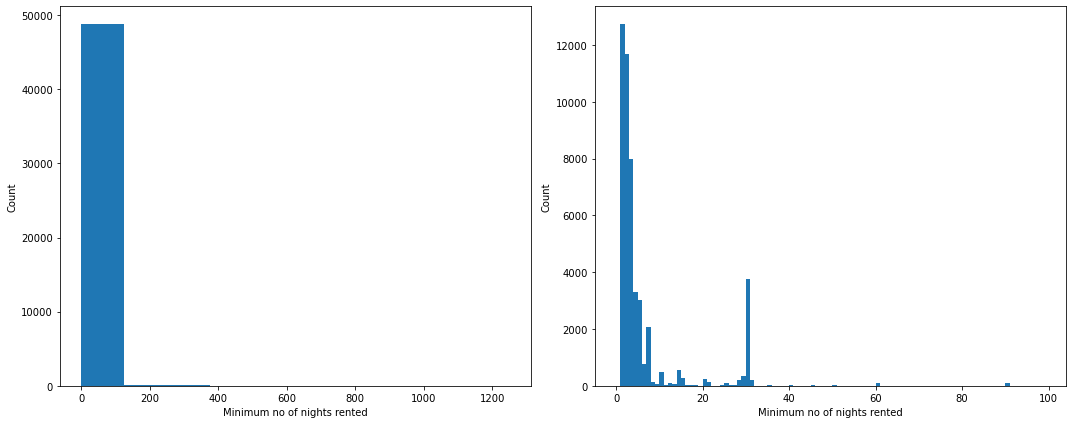

In [202]:
# Minimum number of nights rented is expected to be on the lower side so no surprises there

fig,axes = plt.subplots(1, 2, figsize=(15,6), sharey=False)
axes[0].hist(df.minimum_nights)
axes[1].hist(df.minimum_nights, bins=np.arange(100))
axes[0].set_xlabel("Minimum no of nights rented")
axes[0].set_ylabel("Count")
axes[1].set_xlabel("Minimum no of nights rented")
axes[1].set_ylabel("Count")
plt.tight_layout()

plt.show()

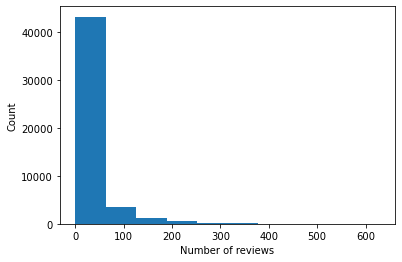

In [203]:
# number of reviews

plt.hist(df.number_of_reviews)
plt.xlabel('Number of reviews')
plt.ylabel("Count")
plt.show()

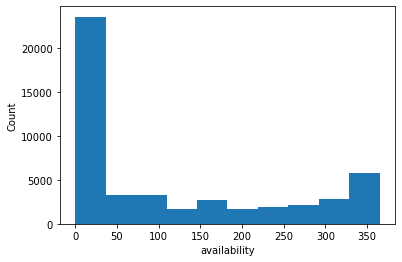

In [204]:
# availability
# Lots of places with availability less tha 50 days.
# Sign that private homeowners are renting out their homes
# Assumption that hotels have commercial rentals have 50+ days availability

plt.hist(df.availability_365)
plt.xlabel("availability")
plt.ylabel("Count")
plt.show()

Looking at the price (outcome variable)

In [205]:
def price_split(price):
    "Splitting prices into low, medium and high"
    if 75 < price < 500:
        return "medium"
    elif price < 75:
        return "low"
    else:
        return "high"

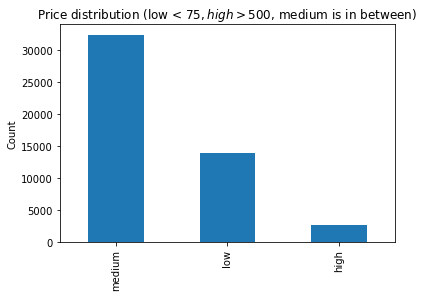

In [206]:
# price
df["price"].apply(price_split).value_counts().plot(kind='bar')
plt.title("Price distribution (low < $75, high > $500, medium is in between)")
plt.ylabel("Count")
plt.show()

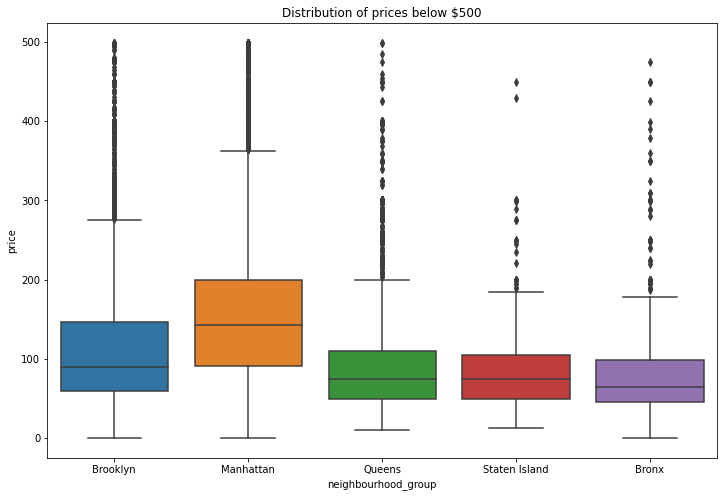

In [207]:
# relationship between neghbourhood and price
# let's chop off the outrageous prices

plt.figure(figsize=(12, 8))
df_price_below_500 = df[df.price < 500]
sns.boxplot(x='neighbourhood_group', y="price", data=df_price_below_500)
plt.title("Distribution of prices below $500")
plt.show()

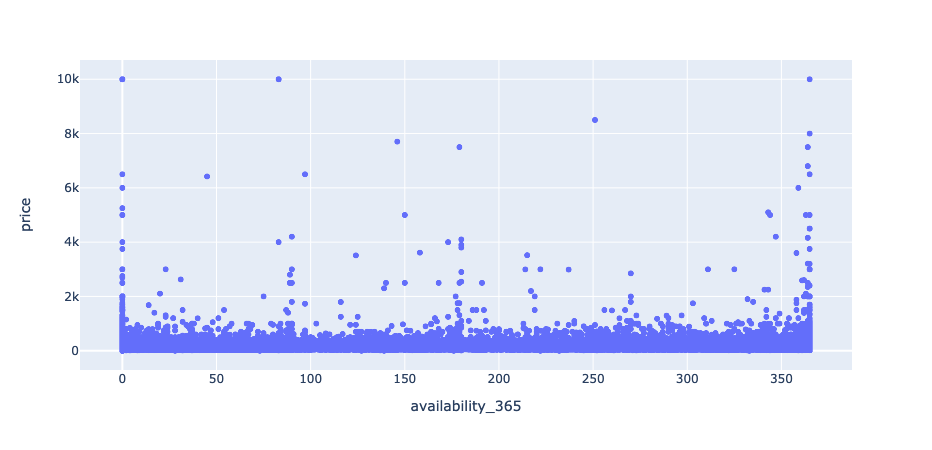

In [208]:
# Doesn't look like there is much of a relationship between availability and the price tag

fig = px.scatter(df, x="availability_365", y="price")
fig.show()

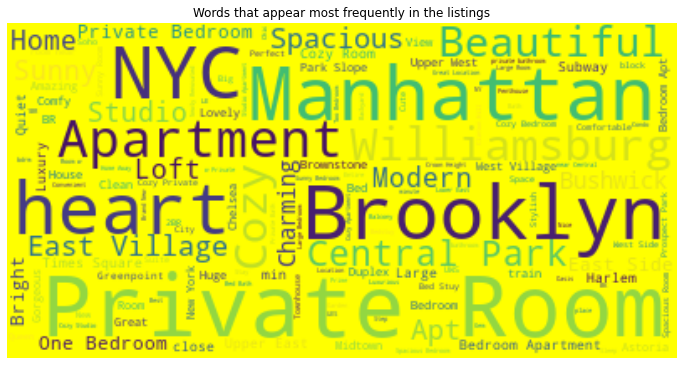

In [209]:
# Looking at the discription of the locations 

text  = " ".join(str(description) for description in df.name)

# create and generate world cloud

wordcloud = WordCloud(max_words=200, background_color='yellow').generate(text)
plt.figure(figsize=(12,8))

# display image 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Words that appear most frequently in the listings")
plt.show()

Data Preprocessing

In [233]:
# Dropping the features that are insignificant
# feature 'reviews_per_month' has nan values which we will
# replace with 0.

X = df.copy()
X.drop(columns=['id', "name", 'host_id', 'host_name', 'last_review'], inplace=True, axis=1)
X['reviews_per_month'] = X['reviews_per_month'].replace(np.nan, 0)

In [234]:
## Checking to see if there are any missing values

X.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [235]:
# seperating the data to target variable

y = df['price']
X.drop(labels='price', axis=1);

In [242]:
# handling the categorical variables

X = pd.get_dummies(X, drop_first=True)
X.shape

(48895, 234)

Splitting the dataset into training, validation and test set

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [248]:
print(f"Size of train set: {X_train.shape, y_train.shape}")
print(f"Size of validation set: {X_val.shape, y_val.shape}")
print(f"Size of test set: {X_test.shape, y_test.shape}")
      

Size of train set: ((39604, 234), (39604,))
Size of validation set: ((4401, 234), (4401,))
Size of test set: ((4890, 234), (4890,))


Starting with a Bayesian model

Using 1 holdout set for validation

In [249]:
from sklearn.linear_model import BayesianRidge

In [250]:
bayes_model = BayesianRidge()

In [251]:
bayes_model.fit(X_train, y_train)

BayesianRidge()

In [254]:
# checking the model performance in the training set
bayes_model.score(X_train, y_train)

0.9999999999963564

In [255]:
## checking the model on the validation set 
bayes_model.score(X_val, y_val)

0.999999999995592

That is pretty good. Let's look at the predictions of the validation set for sanity check.

In [264]:
# A few examples 
y_val[10:25]

21631    125
28552    150
20311    108
31732    200
18485    170
27501     60
33445    285
48103    100
24399    163
5638      65
41520    220
8102     119
10388    120
5910     128
40314     65
Name: price, dtype: int64

In [265]:
bayes_model.predict(X_val[10:25])

array([125.00014317, 149.99959386, 108.00014317, 200.00011263,
       169.99983802,  60.00026519, 284.99922767,  99.99996003,
       162.99922767,  64.9994718 , 220.00026524, 119.00032626,
       120.00020422, 127.99947181,  65.00032627])

Bayes regressor is doing exceptionally well. Let's explore other models to see how they do.

Let's look at decision tree

In [268]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
train_set_score = tree.score(X_train, y_train)
val_set_score = tree.score(X_val, y_val)
print(f"Training set R2 score of decision tree is {train_set_score:.2f} and validation set R2 score is {val_set_score:.2f}")

Training set R2 score of decision tree is 1.00 and validation set R2 score is 1.00


In [269]:
# Let's look at some predictions
print(y_val[50:75])
print(tree.predict(X_val[50:75]))

39673    109
9109      85
46088    395
31087     41
42176     33
23916     57
21608    175
28119     70
25966    100
20031    135
6347     130
48213     69
22311    250
32069     96
29825    125
5109      77
249       36
18120     79
41953    150
7064      99
8642     175
1070      39
27652    120
21666    250
43593    100
Name: price, dtype: int64
[109.  85. 395.  41.  33.  57. 175.  70. 100. 135. 130.  69. 250.  96.
 125.  77.  36.  79. 150.  99. 175.  39. 120. 250. 100.]
